###--       ---------------     **Importar libreria**   ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df =pd.read_csv ("addiction_population_data.csv")

df.head()
print('Dimensiones :\n',df.shape)

# Rejombrado de columnas
renombrar_columnas = {
    'id': 'ID',
    'name': 'Nombre',
    'age': 'Edad',
    'gender': 'Genero',
    'country': 'Pais',
    'city': 'Ciudad',
    'education_level': 'Educacion',
    'employment_status': 'S_laboral',
    'annual_income_usd': 'ingresos',
    'marital_status': 'Estado_civil',
    'children_count': 'Numero_de_hijos',
    'smokes_per_day': 'Cigarrillos_por_dia',
    'drinks_per_week': 'Beber_semana',
    'age_started_smoking': 'Fumar_edad',
    'age_started_drinking': 'Beber_edad',
    'attempts_to_quit_smoking': 'Fumar_dejar',
    'attempts_to_quit_drinking': 'Beber_dejar',
    'has_health_issues': 'Salud_prob',
    'mental_health_status': 'Estado_de_salud_mental',
    'exercise_frequency': 'Frecuencia_de_ejercicio',
    'diet_quality': 'Calidad_de_la_dieta',
    'sleep_hours': 'Horas_de_sueño',
    'bmi': 'IMC',
    'social_support': 'Apoyo_social',
    'therapy_history': 'Historial_psicologico'
}

# Renombrar las columnas
df.rename(columns=renombrar_columnas, inplace=True)

# Verifica que se renombraron correctamente
print(df.columns)

df.info()
# # Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Nombre','Genero', 'Pais','Educacion', 'S_laboral', 'Estado_civil',
       'Salud_prob', 'Frecuencia_de_ejercicio', 'Estado_de_salud_mental', 'Frecuencia_de_ejercicio', 
        'Calidad_de_la_dieta','Apoyo_social','Historial_psicologico']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')
### Comprobacion de los nombres duplicados
###  4. **Verificar duplicados**

# Verificar duplicados
print(df.duplicated().sum())

# Paso 1: Encontrar los nombres duplicados
nombres_duplicados = df['Nombre'][df['Nombre'].duplicated(keep=False)]
conteo = df['Nombre'].value_counts()
repetidos = conteo[conteo > 1]
# print(repetidos)

# Paso 2: Filtrar el DataFrame por esos nombres duplicados
df_duplicados = df[df['Nombre'].isin(nombres_duplicados)]

# print(df_duplicados)

# Agrupar por 'Nombre'
grupos = df_duplicados.groupby('Nombre')

# # Mostrar solo los grupos donde hay diferencias entre las filas
# for nombre, grupo in grupos:
#     if not grupo.drop(columns='Nombre').nunique().eq(1).all():
#         print(f"\n🔁 Nombre duplicado con diferencias: {nombre}")
#         print(grupo)

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:
diferencias = []

for nombre, grupo in grupos:
    if not grupo.drop(columns='Nombre').nunique().eq(1).all():
        diferencias.append(grupo)

df_diferencias = pd.concat(diferencias)

# Ahora puedes analizarlo, guardarlo, etc.
print(df_diferencias)


# Todacolumnas numéricas.s las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

# Preservaremos todas las 
# Resumen estadístico de variables numéricas
print(df.describe())
# Porcentaje de valores faltantes por columna
print(df.isnull().mean() * 100)
#Rellenar datos faltantes
df['Educacion'].fillna('Desconocido', inplace=True)
df['Historial_psicologico'].fillna('Desconocido', inplace=True)
df['Apoyo_social'].fillna('Desconocido', inplace=True)
print(df.isnull().sum())

# import matplotlib.pyplot as plt
# import seaborn as sns

###  5. **Exploración univariada (una variable a la vez)**

# **Variables categóricas:**
sns.countplot(data=df, x='Genero')

# Cambiar etiqueta del eje y
plt.ylabel('Cantidad de personas')


# **Variables numéricas:**

sns.histplot(df['Edad'], kde=True)
plt.ylabel('Cantidad de personas')
plt.show()

sns.boxplot(x=df['Edad'])
plt.show()
# Calcular la matriz de correlación y redondearla a 4 decimales
corr_matrix = df.corr(numeric_only=True).round(4)

# # Imprimirla (opcional)
# print(corr_matrix)

# # Graficar el heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt
print(df.corr(numeric_only=True))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.show()

###  6. **Exploración bivariada (relación entre dos variables)**

# **Numérica vs numérica:**

sns.scatterplot(x='Edad', y='Cigarrillos_por_dia', data=df)
plt.show()

# Correlación
print(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".3f")
plt.show()

# Calcular la matriz de correlación redondeada a 4 decimales
corr_matrix = df.corr(numeric_only=True).round(4)

# Mostrar la matriz (opcional)
print(corr_matrix)

# # Graficar el heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

# **Categórica vs numérica:**

sns.boxplot(x='Genero', y='Cigarrillos_por_dia', data=df)
plt.show()
print(df['Genero'].unique())

# Variables numéricas que te interesan
vars_personalizadas = [
    'Edad',
    'Horas_de_sueño',
    'IMC',
    # 'ingresos',
    'Cigarrillos_por_dia',
    'Beber_semana'
]

# Filtrar DataFrame para eliminar filas con NaNs en esas columnas + 'Genero'
df_filtrado = df.dropna(subset=vars_personalizadas + ['Genero'])

# Paleta de colores personalizada
custom_palette = {
    'Male': "#12bb4b",   # Azul
    'Female': "#4E33E4",    # Naranja
    'Other': "#0e0f0e"         # Verde
}

# Crear el pairplot con colores personalizados
sns.pairplot(
    df_filtrado,
    vars=vars_personalizadas,
    hue='Genero',
    palette=custom_palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40},
    height=2.5
)

plt.suptitle("Pairplot con colores personalizados por género", y=1.02)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt



# Solo numéricas
vars_numericas = ['Edad', 'Horas_de_sueño', 'IMC', 'ingresos']

# Pairplot con hue
sns.pairplot(df.dropna(subset=vars_numericas + ['Genero']),
             vars=vars_numericas,
             hue='Genero',
             palette='Set2')

plt.suptitle("Pairplot coloreado por género", y=1.02)
plt.show()

# # Pairplot
# sns.pairplot(df_numericas)
# plt.suptitle("Pairplot de variables numéricas", y=1.02)

# plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df =pd.read_csv ("addiction_population_data.csv")

df.head()
print('Dimensiones :\n',df.shape)

# Rejombrado de columnas
renombrar_columnas = {
    'id': 'ID',
    'name': 'Nombre',
    'age': 'Edad',
    'gender': 'Genero',
    'country': 'Pais',
    'city': 'Ciudad',
    'education_level': 'Educacion',
    'employment_status': 'S_laboral',
    'annual_income_usd': 'ingresos',
    'marital_status': 'Estado_civil',
    'children_count': 'Numero_de_hijos',
    'smokes_per_day': 'Cigarrillos_por_dia',
    'drinks_per_week': 'Beber_semana',
    'age_started_smoking': 'Fumar_edad',
    'age_started_drinking': 'Beber_edad',
    'attempts_to_quit_smoking': 'Fumar_dejar',
    'attempts_to_quit_drinking': 'Beber_dejar',
    'has_health_issues': 'Salud_prob',
    'mental_health_status': 'Estado_de_salud_mental',
    'exercise_frequency': 'Frecuencia_de_ejercicio',
    'diet_quality': 'Calidad_de_la_dieta',
    'sleep_hours': 'Horas_de_sueño',
    'bmi': 'IMC',
    'social_support': 'Apoyo_social',
    'therapy_history': 'Historial_psicologico'
}

# Renombrar las columnas
df.rename(columns=renombrar_columnas, inplace=True)

# Verifica que se renombraron correctamente
print(df.columns)

df.info()
# # Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Nombre','Genero', 'Pais','Educacion', 'S_laboral', 'Estado_civil',
       'Salud_prob', 'Frecuencia_de_ejercicio', 'Estado_de_salud_mental', 'Frecuencia_de_ejercicio', 
        'Calidad_de_la_dieta','Apoyo_social','Historial_psicologico']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')
### Comprobacion de los nombres duplicados
###  4. **Verificar duplicados**

# Verificar duplicados
print(df.duplicated().sum())

# Paso 1: Encontrar los nombres duplicados
nombres_duplicados = df['Nombre'][df['Nombre'].duplicated(keep=False)]
conteo = df['Nombre'].value_counts()
repetidos = conteo[conteo > 1]
# print(repetidos)

# Paso 2: Filtrar el DataFrame por esos nombres duplicados
df_duplicados = df[df['Nombre'].isin(nombres_duplicados)]

# print(df_duplicados)

# Agrupar por 'Nombre'
grupos = df_duplicados.groupby('Nombre')

# # Mostrar solo los grupos donde hay diferencias entre las filas
# for nombre, grupo in grupos:
#     if not grupo.drop(columns='Nombre').nunique().eq(1).all():
#         print(f"\n🔁 Nombre duplicado con diferencias: {nombre}")
#         print(grupo)

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:
diferencias = []

for nombre, grupo in grupos:
    if not grupo.drop(columns='Nombre').nunique().eq(1).all():
        diferencias.append(grupo)

df_diferencias = pd.concat(diferencias)

# Ahora puedes analizarlo, guardarlo, etc.
print(df_diferencias)


# Todacolumnas numéricas.s las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

# Preservaremos todas las 
# Resumen estadístico de variables numéricas
print(df.describe())
# Porcentaje de valores faltantes por columna
print(df.isnull().mean() * 100)
#Rellenar datos faltantes
df['Educacion'].fillna('Desconocido', inplace=True)
df['Historial_psicologico'].fillna('Desconocido', inplace=True)
df['Apoyo_social'].fillna('Desconocido', inplace=True)
print(df.isnull().sum())

# import matplotlib.pyplot as plt
# import seaborn as sns

###  5. **Exploración univariada (una variable a la vez)**

# **Variables categóricas:**
sns.countplot(data=df, x='Genero')

# Cambiar etiqueta del eje y
plt.ylabel('Cantidad de personas')


# **Variables numéricas:**

sns.histplot(df['Edad'], kde=True)
plt.ylabel('Cantidad de personas')
plt.show()

sns.boxplot(x=df['Edad'])
plt.show()
# Calcular la matriz de correlación y redondearla a 4 decimales
corr_matrix = df.corr(numeric_only=True).round(4)

# # Imprimirla (opcional)
# print(corr_matrix)

# # Graficar el heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt
print(df.corr(numeric_only=True))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.show()

###  6. **Exploración bivariada (relación entre dos variables)**

# **Numérica vs numérica:**

sns.scatterplot(x='Edad', y='Cigarrillos_por_dia', data=df)
plt.show()

# Correlación
print(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".3f")
plt.show()

# Calcular la matriz de correlación redondeada a 4 decimales
corr_matrix = df.corr(numeric_only=True).round(4)

# Mostrar la matriz (opcional)
print(corr_matrix)

# # Graficar el heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

# **Categórica vs numérica:**

sns.boxplot(x='Genero', y='Cigarrillos_por_dia', data=df)
plt.show()
print(df['Genero'].unique())

# Variables numéricas que te interesan
vars_personalizadas = [
    'Edad',
    'Horas_de_sueño',
    'IMC',
    # 'ingresos',
    'Cigarrillos_por_dia',
    'Beber_semana'
]

# Filtrar DataFrame para eliminar filas con NaNs en esas columnas + 'Genero'
df_filtrado = df.dropna(subset=vars_personalizadas + ['Genero'])

# Paleta de colores personalizada
custom_palette = {
    'Male': "#12bb4b",   # Azul
    'Female': "#4E33E4",    # Naranja
    'Other': "#0e0f0e"         # Verde
}

# Crear el pairplot con colores personalizados
sns.pairplot(
    df_filtrado,
    vars=vars_personalizadas,
    hue='Genero',
    palette=custom_palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40},
    height=2.5
)

plt.suptitle("Pairplot con colores personalizados por género", y=1.02)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt



# Solo numéricas
vars_numericas = ['Edad', 'Horas_de_sueño', 'IMC', 'ingresos']

# Pairplot con hue
sns.pairplot(df.dropna(subset=vars_numericas + ['Genero']),
             vars=vars_numericas,
             hue='Genero',
             palette='Set2')

plt.suptitle("Pairplot coloreado por género", y=1.02)
plt.show()

# # Pairplot
# sns.pairplot(df_numericas)
# plt.suptitle("Pairplot de variables numéricas", y=1.02)

# plt.show()

In [ ]:
df =pd.read_csv ("addiction_population_data.csv")

df.head()
print('Dimensiones :\n',df.shape)

# Rejombrado de columnas
renombrar_columnas = {
    'id': 'ID',
    'name': 'Nombre',
    'age': 'Edad',
    'gender': 'Genero',
    'country': 'Pais',
    'city': 'Ciudad',
    'education_level': 'Educacion',
    'employment_status': 'S_laboral',
    'annual_income_usd': 'ingresos',
    'marital_status': 'Estado_civil',
    'children_count': 'Numero_de_hijos',
    'smokes_per_day': 'Cigarrillos_por_dia',
    'drinks_per_week': 'Beber_semana',
    'age_started_smoking': 'Fumar_edad',
    'age_started_drinking': 'Beber_edad',
    'attempts_to_quit_smoking': 'Fumar_dejar',
    'attempts_to_quit_drinking': 'Beber_dejar',
    'has_health_issues': 'Salud_prob',
    'mental_health_status': 'Estado_de_salud_mental',
    'exercise_frequency': 'Frecuencia_de_ejercicio',
    'diet_quality': 'Calidad_de_la_dieta',
    'sleep_hours': 'Horas_de_sueño',
    'bmi': 'IMC',
    'social_support': 'Apoyo_social',
    'therapy_history': 'Historial_psicologico'
}

# Renombrar las columnas
df.rename(columns=renombrar_columnas, inplace=True)

# Verifica que se renombraron correctamente
print(df.columns)

df.info()
# # Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Nombre','Genero', 'Pais','Educacion', 'S_laboral', 'Estado_civil',
       'Salud_prob', 'Frecuencia_de_ejercicio', 'Estado_de_salud_mental', 'Frecuencia_de_ejercicio', 
        'Calidad_de_la_dieta','Apoyo_social','Historial_psicologico']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')
### Comprobacion de los nombres duplicados
###  4. **Verificar duplicados**

# Verificar duplicados
print(df.duplicated().sum())

# Paso 1: Encontrar los nombres duplicados
nombres_duplicados = df['Nombre'][df['Nombre'].duplicated(keep=False)]
conteo = df['Nombre'].value_counts()
repetidos = conteo[conteo > 1]
# print(repetidos)

# Paso 2: Filtrar el DataFrame por esos nombres duplicados
df_duplicados = df[df['Nombre'].isin(nombres_duplicados)]

# print(df_duplicados)

# Agrupar por 'Nombre'
grupos = df_duplicados.groupby('Nombre')

# # Mostrar solo los grupos donde hay diferencias entre las filas
# for nombre, grupo in grupos:
#     if not grupo.drop(columns='Nombre').nunique().eq(1).all():
#         print(f"\n🔁 Nombre duplicado con diferencias: {nombre}")
#         print(grupo)

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:
diferencias = []

for nombre, grupo in grupos:
    if not grupo.drop(columns='Nombre').nunique().eq(1).all():
        diferencias.append(grupo)

df_diferencias = pd.concat(diferencias)

# Ahora puedes analizarlo, guardarlo, etc.
print(df_diferencias)


# Todacolumnas numéricas.s las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

# Preservaremos todas las 

,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,1,Michael Bates,66,Other,Yemen,Martinmouth,Secondary,Student,45595,Married,...,6,2,True,Good,Daily,Average,5.6,22.4,NaN,Current
1,2,Brian Thompson,29,Male,Saudi Arabia,Harperhaven,Primary,Self-Employed,145842,Single,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,NaN
2,3,Steven Little,75,Male,Togo,Chanport,Postgraduate,Unemployed,162480,Single,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,NaN
3,4,Michael Mathews,35,Other,Togo,North Cory,University,Unemployed,16023,In a relationship,...,5,7,False,Average,Daily,Good,7.2,25.5,Moderate,Current
4,5,Nicholas Sanchez,38,Female,Morocco,Danielberg,College,Self-Employed,62933,In a relationship,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past


In [ ]:
# Resumen estadístico de variables numéricas
print(df.describe())
# Porcentaje de valores faltantes por columna
print(df.isnull().mean() * 100)
#Rellenar datos faltantes
df['Educacion'].fillna('Desconocido', inplace=True)
df['Historial_psicologico'].fillna('Desconocido', inplace=True)
df['Apoyo_social'].fillna('Desconocido', inplace=True)
print(df.isnull().sum())

# import matplotlib.pyplot as plt
# import seaborn as sns

###  5. **Exploración univariada (una variable a la vez)**

# **Variables categóricas:**
sns.countplot(data=df, x='Genero')

# Cambiar etiqueta del eje y
plt.ylabel('Cantidad de personas')


# **Variables numéricas:**

sns.histplot(df['Edad'], kde=True)
plt.ylabel('Cantidad de personas')
plt.show()

sns.boxplot(x=df['Edad'])
plt.show()
# Calcular la matriz de correlación y redondearla a 4 decimales
corr_matrix = df.corr(numeric_only=True).round(4)

# # Imprimirla (opcional)
# print(corr_matrix)

# # Graficar el heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt
print(df.corr(numeric_only=True))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.show()

###  6. **Exploración bivariada (relación entre dos variables)**

# **Numérica vs numérica:**

sns.scatterplot(x='Edad', y='Cigarrillos_por_dia', data=df)
plt.show()

# Correlación
print(df.corr(numeric_only=True))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',fmt=".3f")
plt.show()

# Calcular la matriz de correlación redondeada a 4 decimales
corr_matrix = df.corr(numeric_only=True).round(4)

# Mostrar la matriz (opcional)
print(corr_matrix)

# # Graficar el heatmap
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()


                ID         Edad       ingresos  Numero_de_hijos  \
count  3000.000000  3000.000000    3000.000000      3000.000000   
mean   1500.500000    46.654333   98904.178000         2.453667   
std     866.169729    18.740880   57288.035963         1.704354   
min       1.000000    15.000000     560.000000         0.000000   
25%     750.750000    31.000000   49336.000000         1.000000   
50%    1500.500000    47.000000   98616.500000         2.000000   
75%    2250.250000    63.000000  148622.750000         4.000000   
max    3000.000000    79.000000  199951.000000         5.000000   

       Cigarrillos_por_dia  Beber_semana   Fumar_edad   Beber_edad  \
count          3000.000000   3000.000000  3000.000000  3000.000000   
mean             10.034000      5.002333    24.365667    24.525333   
std               3.108386      2.214037     8.707309     8.679121   
min               2.000000      0.000000    10.000000    10.000000   
25%               8.000000      3.000000    17

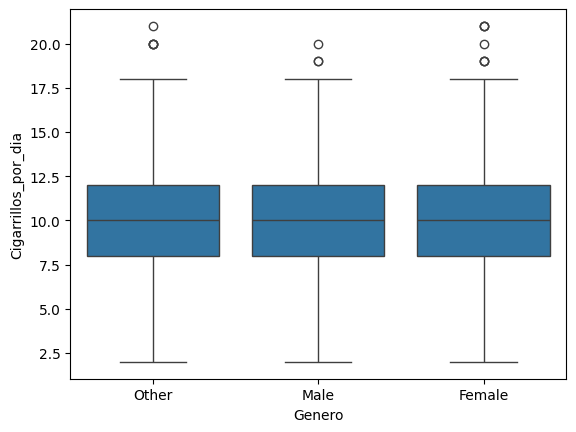

In [ ]:
# **Categórica vs numérica:**

sns.boxplot(x='Genero', y='Cigarrillos_por_dia', data=df)
plt.show()
print(df['Genero'].unique())

# Variables numéricas que te interesan
vars_personalizadas = [
    'Edad',
    'Horas_de_sueño',
    'IMC',
    # 'ingresos',
    'Cigarrillos_por_dia',
    'Beber_semana'
]

# Filtrar DataFrame para eliminar filas con NaNs en esas columnas + 'Genero'
df_filtrado = df.dropna(subset=vars_personalizadas + ['Genero'])

# Paleta de colores personalizada
custom_palette = {
    'Male': "#12bb4b",   # Azul
    'Female': "#4E33E4",    # Naranja
    'Other': "#0e0f0e"         # Verde
}

# Crear el pairplot con colores personalizados
sns.pairplot(
    df_filtrado,
    vars=vars_personalizadas,
    hue='Genero',
    palette=custom_palette,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40},
    height=2.5
)

plt.suptitle("Pairplot con colores personalizados por género", y=1.02)
plt.show()


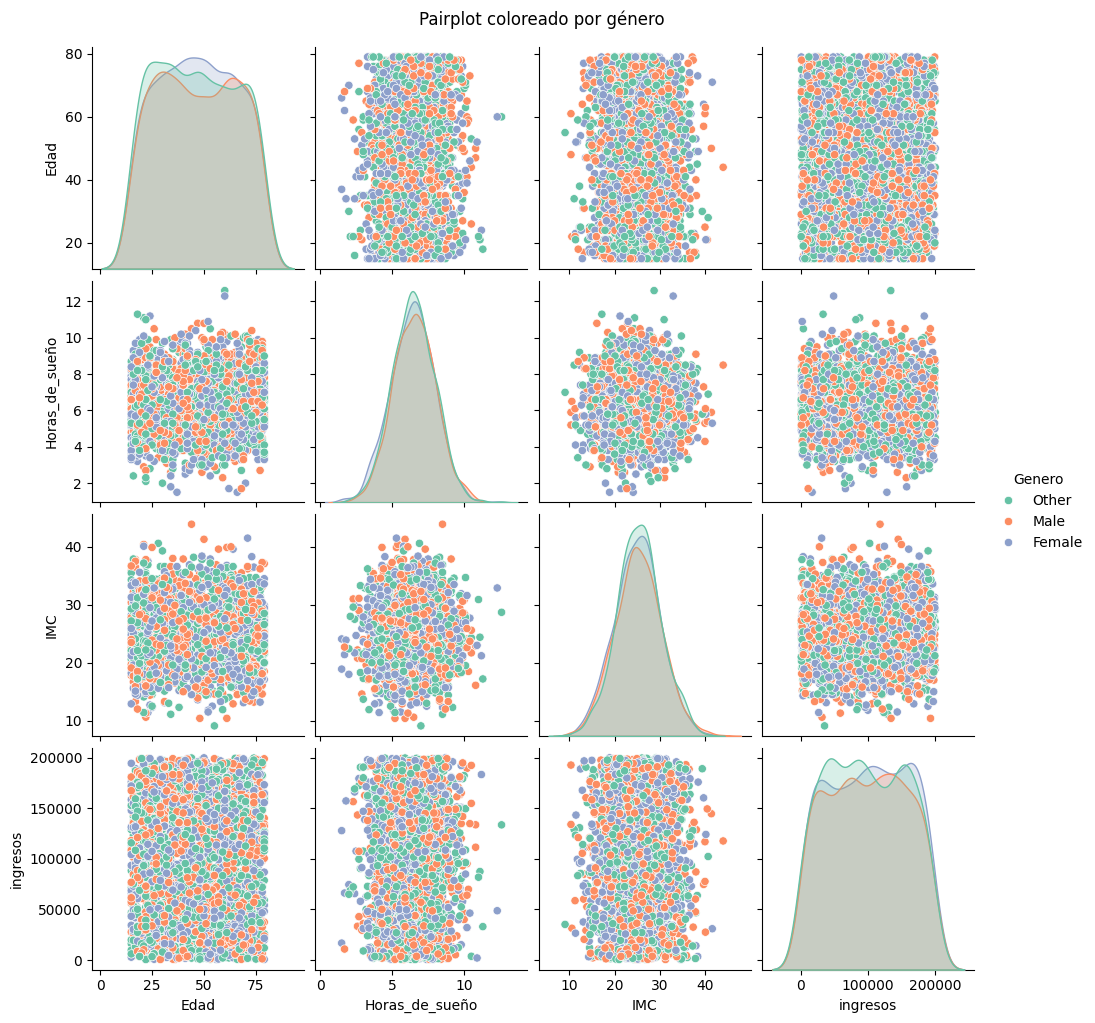

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt



# Solo numéricas
vars_numericas = ['Edad', 'Horas_de_sueño', 'IMC', 'ingresos']

# Pairplot con hue
sns.pairplot(df.dropna(subset=vars_numericas + ['Genero']),
             vars=vars_numericas,
             hue='Genero',
             palette='Set2')

plt.suptitle("Pairplot coloreado por género", y=1.02)
plt.show()

# # Pairplot
# sns.pairplot(df_numericas)
# plt.suptitle("Pairplot de variables numéricas", y=1.02)

# plt.show()